In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.ensemble import RandomForestRegressor

Create subset of large float data set

In [2]:
format_data = False
if format_data:
    data = pd.read_pickle('merged.pkl')
    # data.loc[:,'WMO'].unique()
    wmo = 6903549
    data = data.loc[data.loc[:,'WMO']==wmo, :]
    data.to_csv(str(int(wmo))+'.csv')

Load data set

In [3]:
data = pd.read_csv('6903549.csv')
data

,Unnamed: 0,WMO,PROF,JULD,LON,LAT,PRES,PRES_ERROR,TEMP,TEMP_ERROR,...,DOXY,DOXY_ERROR,DEPTH,SIGMA0,THETA0,DOY,DOY_SIN,DOY_COS,YEAR,BATH
0,0,6903549,0,2019-07-09 11:20:00.000000000,-0.348200,67.873282,3.500000,2.4,9.868,0.002,...,293.601593,14.438773,3.464992,1026.996293,9.867601,190,-0.126528,-0.991963,2019,3587.0
1,1,6903549,0,2019-07-09 11:20:00.000000000,-0.348200,67.873282,38.900002,2.4,7.714,0.002,...,290.336884,15.069548,38.507605,1027.335259,7.710177,190,-0.126528,-0.991963,2019,3587.0
2,2,6903549,0,2019-07-09 11:20:00.000000000,-0.348200,67.873282,83.099998,2.4,5.632,0.002,...,286.616455,15.715446,82.252925,1027.563330,5.625143,190,-0.126528,-0.991963,2019,3587.0
3,3,6903549,0,2019-07-09 11:20:00.000000000,-0.348200,67.873282,175.000000,2.4,4.359,0.002,...,285.616211,16.035276,173.177592,1027.694572,4.346201,190,-0.126528,-0.991963,2019,3587.0
4,4,6903549,0,2019-07-09 11:20:00.000000000,-0.348200,67.873282,185.000000,2.4,4.190,0.002,...,283.567444,16.082691,183.069024,1027.714435,4.176704,190,-0.126528,-0.991963,2019,3587.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,1439,6903549,124,2021-04-29 11:24:00.000000000,-1.848182,69.771525,231.000000,2.4,4.727,0.002,...,293.238739,15.798958,228.536447,1027.737687,4.709293,119,0.888701,-0.458487,2021,3170.0
1440,1440,6903549,124,2021-04-29 11:24:00.000000000,-1.848182,69.771525,265.000000,2.4,4.614,0.002,...,299.047668,15.787277,262.152300,1027.746741,4.593857,119,0.888701,-0.458487,2021,3170.0
1441,1441,6903549,124,2021-04-29 11:24:00.000000000,-1.848182,69.771525,279.100006,2.4,4.566,0.002,...,295.238251,15.780339,276.091381,1027.749042,4.544863,119,0.888701,-0.458487,2021,3170.0
1442,1442,6903549,124,2021-04-29 11:24:00.000000000,-1.848182,69.771525,515.099976,2.4,2.068,0.002,...,288.379547,16.362040,509.257521,1027.910545,2.038471,119,0.888701,-0.458487,2021,3170.0


In [4]:
predictor_features = ['PSAL', 'THETA0', 'DEPTH', 'LON', 
                      'YEAR', 'BATH', 'DOY_SIN', 'DOY_COS']

target_feature = 'DOXY'

Load model

In [5]:
model = joblib.load('model.joblib')

In [22]:
doxy_true = data.loc[:,target_feature]
doxy_rf = model.predict(data.loc[:,predictor_features])
rmse = np.sqrt(np.nanmean((doxy_true-doxy_rf)**2))

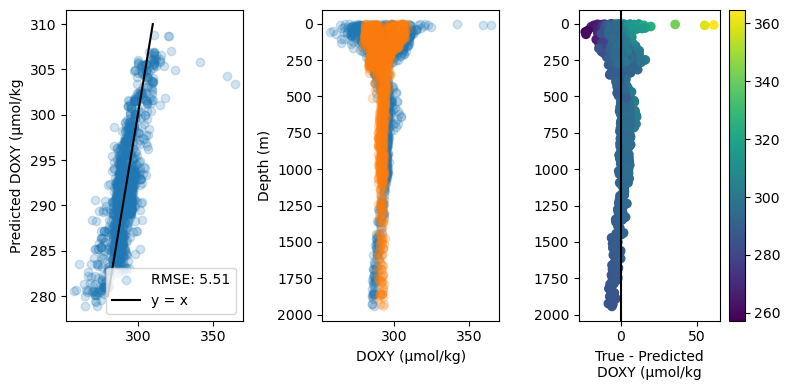

In [23]:
fig = plt.figure(figsize = (8, 4))
rr = 1; cc = 3

ax1 = fig.add_subplot(rr,cc,1)
ax1.scatter(doxy_true, doxy_rf, alpha = 0.2, label = 'RMSE: '+str(np.round(rmse, 2)))
ax1.plot([280, 310],[280,310],'k-', label = 'y = x')
ax1.legend()
ax1.set_ylabel('Predicted DOXY (µmol/kg')
ax2.set_xlabel('True DOXY (µmol/kg')

ax2 = fig.add_subplot(rr,cc,2)
ax2.scatter(doxy_true, data.loc[:,'DEPTH'], label = 'True',
           alpha  = 0.2)
ax2.scatter(doxy_rf, data.loc[:,'DEPTH'], label='RF',
           alpha = 0.2)
ax2.invert_yaxis()
ax2.set_ylabel('Depth (m)')
ax2.set_xlabel('DOXY (µmol/kg)')

ax3 = fig.add_subplot(rr,cc,3)
c = ax3.scatter(doxy_true-doxy_rf, data.loc[:,'DEPTH'], c= doxy_true)
ax3.invert_yaxis()
ax3.axvline(0, color = 'k')
ax3.set_xlabel('True - Predicted\nDOXY (µmol/kg')
fig.colorbar(c, ax = ax3)

fig.tight_layout()